In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 817.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [ ]:
from huggingface_hub import login
login("HF_TOKEN")

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your image prompt: mango


  0%|          | 0/50 [00:00<?, ?it/s]

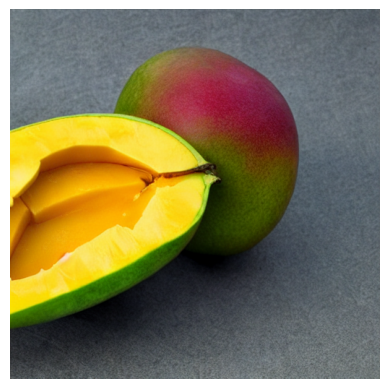

In [ ]:
user_prompt = input("Enter your image prompt: ")
image = pipe(user_prompt).images[0]

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!pip install flask flask-cors


In [ ]:
!ngrok config add-authtoken ngrok_config_addauthtoken


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [28]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print("🔗 Public URL:", public_url)


🔗 Public URL: NgrokTunnel: "https://9f0aecc84f2c.ngrok-free.app" -> "http://localhost:5000"


In [25]:
!pip install flask-cors


In [ ]:
# 🧠 Add this cell to define and run Flask API

from flask import Flask, request, jsonify
from flask_cors import CORS
import io
import base64
from PIL import Image


app = Flask(__name__)
CORS(app)  # ← this line is required
CORS(app, resources={r"/generate": {"origins": "*"}})



@app.route('/generate', methods=['POST'])
def generate_image():
    data = request.get_json()
    prompt = data.get("prompt", "")

    if not prompt:
        return jsonify({"error": "Prompt is required"}), 400

    try:
        image = pipe(prompt).images[0]
        buffer = io.BytesIO()
        image.save(buffer, format="PNG")
        image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
        return jsonify({"image": f"data:image/png;base64,{image_base64}"})
    except Exception as e:
        return jsonify({"error": str(e)}), 500

app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:35:26] "OPTIONS /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:35:35] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:37:13] "OPTIONS /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:37:23] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:37:35] "OPTIONS /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:37:44] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:38:29] "OPTIONS /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:38:38] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:38:48] "OPTIONS /generate HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [11/Jul/2025 21:38:57] "POST /generate HTTP/1.1" 200 -
